In [34]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub

from keras.layers import Dense, Flatten, Conv2D
from keras.models import Sequential

In [31]:
# https://tfhub.dev/google/imagenet/mobilenet_v1_050_128/classification/5

#LOAD DATA


In [35]:
LAYERS=[tensorflow_hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_050_128/classification/5", input_shape=(224,224,3))]

model=Sequential(LAYERS)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              1343049   
                                                                 
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


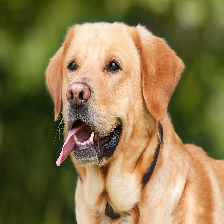

In [43]:
from keras_preprocessing import image
import numpy as np
test_image=image.load_img('/content/drive/MyDrive/DL/CNN/dataset_dogcat1/single_prediction/cat_or_dog_1.jpg', target_size=(224,224))
test_image

In [58]:
trasformed_testimage=np.expand_dims((image.img_to_array(test_image)/255), axis=0)
arg=np.argmax(model.predict(trasformed_testimage))
arg

1/1 [==============================] - 0s 42ms/step


209

In [59]:
labels=[]
with open("/content/drive/MyDrive/DL/CNN/ImageNetLabels.txt",'r') as f:
  labels=f.read().splitlines()
labels[:10] #sample output

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [60]:
print(f"Predicted image is {labels[arg]}")

Predicted image is Labrador retriever


In [72]:
for layer in model.layers:
  print(layer.trainable)

False


In [61]:
#Whatif i wanted to make a model on top of this mobilenet to classify flowers which is not trained on prior

In [74]:
LAYERS=[tensorflow_hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_050_128/classification/5", input_shape=(224,224,3)),
        Dense(units=128, activation='relu'),
        Dense(units=5,activation='softmax')]

model1=Sequential(LAYERS)
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1001)              1343049   
                                                                 
 dense_2 (Dense)             (None, 128)               128256    
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1,471,950
Trainable params: 128,901
Non-trainable params: 1,343,049
_________________________________________________________________


In [155]:
model1.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [88]:
#Prepare the data
from keras_preprocessing.image import  ImageDataGenerator
import pathlib
data=pathlib.Path("/content/drive/MyDrive/DL/CNN/flower_photos")

list(data.glob("*/*.jpg"))[:5] #list the file names contained in the path

[PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/daisy/153210866_03cc9f2f36.jpg'),
 PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/daisy/154332674_453cea64f4.jpg'),
 PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/daisy/169371301_d9b91a2a42.jpg'),
 PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/daisy/162362896_99c7d851c8_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/daisy/1656856503_447e5b0f03.jpg')]

In [91]:
list(data.glob("daisy/*.jpg"))[:3] #dig into respective files using this functionality

[PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/daisy/153210866_03cc9f2f36.jpg'),
 PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/daisy/154332674_453cea64f4.jpg'),
 PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/daisy/169371301_d9b91a2a42.jpg')]

In [96]:
images_dict={"daisy":list(data.glob("daisy/*.jpg")),
             "dandelion":list(data.glob("dandelion/*.jpg")),
             "roses":list(data.glob("roses/*.jpg")),
             "sunflowers":list(data.glob("sunflowers/*.jpg")),
             "tulips":list(data.glob("tulips/*.jpg"))}
images_dict.get("daisy")[:3]

[PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/daisy/153210866_03cc9f2f36.jpg'),
 PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/daisy/154332674_453cea64f4.jpg'),
 PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/daisy/169371301_d9b91a2a42.jpg')]

In [97]:
label_dict={"daisy":0,
             "dandelion":1,
             "roses":2,
             "sunflowers":3,
             "tulips":4}
label_dict            

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [163]:
X, y=[],[]

import cv2

cv2.imread(str(images_dict.get("daisy")[0]))

for key,val in images_dict.items():
  for files in val:
    X.append(cv2.resize(cv2.imread(str(files)),(224,224)))
    y.append(label_dict.get(key))

X = np.array(X)
y = np.array(y)

In [164]:
len(X), len(y)

(600, 600)

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [171]:
model1.fit(X_train_scaled, y_train, epochs=2, batch_size=32,verbose=2)

Epoch 1/2
15/15 - 7s - loss: 0.0162 - acc: 1.0000 - 7s/epoch - 439ms/step
Epoch 2/2
15/15 - 7s - loss: 0.0141 - acc: 1.0000 - 7s/epoch - 448ms/step


In [172]:
model1.evaluate(X_test_scaled,y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 2s 435ms/step - loss: 0.4768 - acc: 0.8500


[0.47681382298469543, 0.8500000238418579]

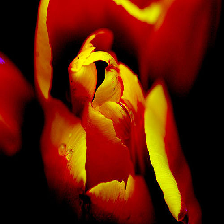

In [175]:
from keras_preprocessing import image
test_pred=image.load_img("/content/drive/MyDrive/DL/CNN/flower_photos/tulips/10791227_7168491604.jpg", target_size=(224,224))
test_pred
# model1.predict()

In [187]:
np.argmax(model1.predict(np.expand_dims((image.img_to_array(test_pred)/255), axis=0)))

1/1 [==============================] - 0s 44ms/step


4

In [188]:
label_dict

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}